# Exploratory Data Analysis

In [2]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [22]:
df = pd.read_csv("../data/raw/gdm.csv")
df.head()

,number,age (years),ethnicity,diabetes mellitus,mean diastolic bp (mmhg),mean systolic bp (mmhg),central armellini fat (mm),current gestational age,pregnancies (number),first fasting glucose (mg/dl),bmi pregestational (kg/m),gestational age at birth,type of delivery,child birth weight (g),gestational dm
0,1,20,NaN,0,73.5,125.0,28.1,"12,1",1.0,NaN,33.20,"41,0",1,3840,0
1,2,28,0.0,0,75.5,112.0,43.1,"11,5",1.0,76.0,21.50,"39,1",0,2810,0
2,5,21,1.0,0,70.5,116.0,41.4,"12,6",1.0,86.0,21.41,"39,5",0,2455,0
3,9,25,0.0,0,92.5,167.0,39.6,"16,2",4.0,NaN,55.36,"39,4",0,3400,0
4,13,33,1.0,0,79.0,137.0,67.8,"11,2",2.0,86.0,30.85,"40,2",1,3930,1


Number is a unique id that can be easily dropped, target is gestational dm

In [23]:
#delete number column 
del df["number"] 

#Check missing values, datatypes, dimension
print(f"Columns are: {df.columns}")
print("-"*50)
print(f"Shape of the dataframe is: {df.shape}")
print("-"*50)
print(f"Basic information: {df.info()}")

Columns are: Index(['age (years)', 'ethnicity', 'diabetes mellitus',
       'mean diastolic bp (mmhg)', 'mean systolic bp (mmhg)',
       'central armellini fat (mm)', 'current gestational age',
       'pregnancies (number)', 'first fasting glucose (mg/dl)',
       'bmi pregestational (kg/m)', 'gestational age at birth',
       'type of delivery', 'child birth weight (g)', 'gestational dm'],
      dtype='object')
--------------------------------------------------
Shape of the dataframe is: (133, 14)
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age (years)                    133 non-null    int64  
 1   ethnicity                      132 non-null    float64
 2   diabetes mellitus              133 non-null    int64  
 3   mean diastolic bp (mmhg)       133

There are 13 features + 1 target, missing values in ethnicity, pregnancies (number), first fasting glucose (mg/dl) and mixed data types

In [11]:
df.describe()

,age (years),ethnicity,diabetes mellitus,mean diastolic bp (mmhg),mean systolic bp (mmhg),central armellini fat (mm),pregnancies (number),first fasting glucose (mg/dl),bmi pregestational (kg/m),type of delivery,child birth weight (g),gestational dm
count,133.000000,132.000000,133.000000,133.000000,133.000000,133.000000,128.000000,103.000000,132.000000,133.000000,133.000000,133.000000
mean,25.804511,0.439394,0.007519,70.593985,116.578947,44.230827,2.351562,81.272816,27.871136,0.240602,3257.563910,0.135338
std,6.366887,0.498204,0.086711,8.657662,13.879602,14.606195,1.686397,9.429794,6.874268,0.429065,490.318578,0.343378
min,15.000000,0.000000,0.000000,51.500000,90.000000,12.700000,1.000000,60.000000,15.810000,0.000000,1105.000000,0.000000
25%,21.000000,0.000000,0.000000,64.500000,107.000000,34.600000,1.000000,76.500000,22.550000,0.000000,2944.000000,0.000000
50%,25.000000,0.000000,0.000000,70.000000,114.000000,42.500000,2.000000,80.000000,26.260000,0.000000,3220.000000,0.000000
75%,30.000000,1.000000,0.000000,75.500000,125.000000,52.700000,3.000000,86.500000,30.935000,0.000000,3610.000000,0.000000
max,43.000000,1.000000,1.000000,100.500000,167.000000,94.400000,9.000000,114.000000,55.360000,1.000000,4534.000000,1.000000


Mean age is 26, most do not have previous diabetes, maximum number of pregnancy is 9, mean bmi is 28 which suggest overweight, type of delivery in majority was normal/vaginal. 

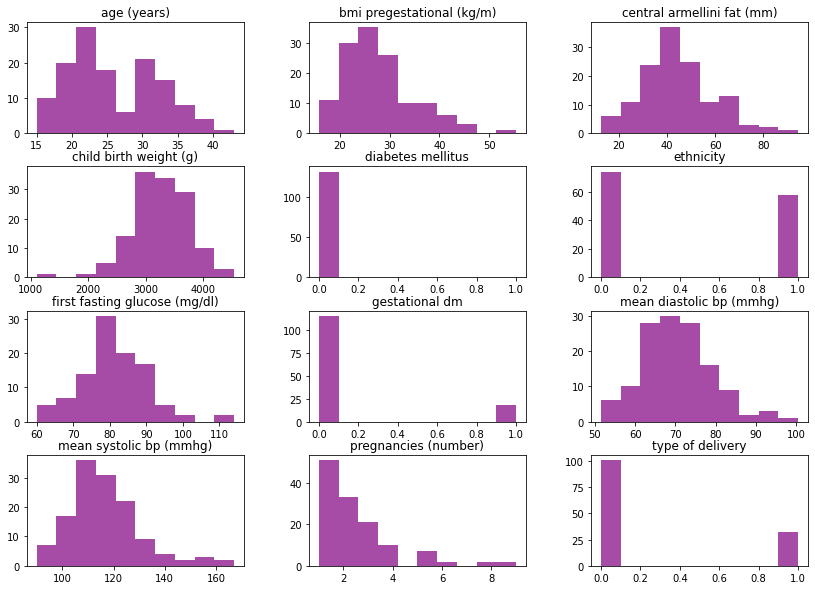

In [15]:
#Check data distribution
df.hist(figsize=(14,10), color="purple",alpha=0.7, grid=False);

Takeawayas: There are 8 continuous features, 3 categorical features and one categorical target. The target classes are imbalanced. Pregnancies(number) is highly skewed towards right reflects the description stats above. 

In [13]:
##Check % of data distribution in target
a,b=np.bincount(df['gestational dm'])
print(f"Percentage of data distribution in the two classes are:")
print(round(a/(a+b)*100,2))
print(round(b/(a+b)*100,2))

Percentage of data distribution in the two classes are:
86.47
13.53


Imbalanced dataset, will need pre-processing

In [19]:
18/133

0.13533834586466165